# **Treinando um model de Random Forest para classificar diferentes classes de gestos usando como entrada sinais de EMG**

Nesta prática, serão disponibilizados dados de EMG para serem empregados como entrada para treinar um modelo clássico de machine learning chamado de Random Forest.


Foram utilizados oito eletrodos EMG bipolares para medir as ativações mioelétricas e realizar a aquisição dos sinais de EMG. Os sinais foram adquiridos a uma taxa de amostragem de 1.200 Hz utilizando um bioamplificador g.USBamp da g.tec, que aplicou um filtro passa-banda do tipo Butterworth (5 Hz – 500 Hz). O ruído da rede elétrica foi removido por meio de um filtro notch em 50 Hz. O usuário realizou quatro tipos de preensão para a coleta de dados offline. Esses gestos foram selecionados de modo que a mão pudesse realizar os gestos mais empregados para pegar um 'bowl'. Para cada gesto, o participante iniciava com 10 segundos de repouso, durante os quais a mão permanecia completamente relaxada, seguidos de 10 segundos de execução do gesto. Sinais visuais foram fornecidos aos participantes por meio de uma contagem regressiva de três segundos exibida em uma tela de computador, indicando a transição entre os estados de gesto e repouso.

Os arquivos fornecidos serão baixados nas linhas de código abaixo de um google drive.
Serão quatro arquivos:

*   **X_train**: Input do modelo utilizado para treina-lo. Contém os sinais de EMG que serão utilizados como entrada do modelo e serão aprendidos a ser decodificados. Contém 9 de 10 repetições.
*   **X_test**: Input do modelo utilizado para testa-lo. Contém os sinais de EMG que serão utilizados como entrada do modelo e serão empregados para avaliar a performance do modelo. Contém 1 de 10 repetições, ou seja, é a repetição não vista durante o treinamento.
*   **Y_train**: Contém as labels, ou classes, dos respectivos dados de entrada de treinamento. Ou seja, são um dos 4 gestos ou repouso. Um total de 5 classes.
*   **Y_test**:Contém as labels, ou classes, dos respectivos dados de entrada de teste. Ou seja, são um dos 4 gestos ou repouso. Um total de 5 classes.

Os dados de entrada tem formado (número de amostras, 8, 200, 1), enquanto os dados de saída tem formato (número de amostras, 1).
Para fornecer estes dados para um modelo de Random Forest seguindo a implementação que vou dar para vocês, vocês precisam fazer um reshape para (número de amostras, 16000) usando o operador -1, da seguinte maneira: (-1, 16000).
Os dados estão balanceados e filtrados já.

A seguir, serão dadas algumas tarefas para vocês, mas primeira vamos carregar os dados:





In [ ]:
!pip install -U gdown

In [ ]:
import gdown
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Activation, Dropout, Conv2D, MaxPooling2D, Softmax, BatchNormalization
from tensorflow.keras.optimizers import Adam
from numpy import genfromtxt

# Replace this with your folder ID
folder_id = '14pZ46-ySb3PernSKjuGnIhIMJl-B3xZ5?usp=sharing'

gdown.download_folder(id=folder_id, quiet=False, use_cookies=False)


Retrieving folder contents


Processing file 1yqA6a7pfLeKwoBqDXtjDAsHALVw5a82B X_test.npy
Processing file 1dlcf9dezUOGLDxesLxsUS9ZD9GZHghC4 X_train.npy
Processing file 1Srw2qJXopeQ7LubCrfgBk7v8DGGlOq28 Y_test.npy
Processing file 1dZ8jtelyJJPWwwlDWlMWa1lTjYYjhrBw Y_train.npy


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1yqA6a7pfLeKwoBqDXtjDAsHALVw5a82B
To: /content/Pratica de python 2/X_test.npy
100%|██████████| 33.9M/33.9M [00:00<00:00, 87.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1dlcf9dezUOGLDxesLxsUS9ZD9GZHghC4
From (redirected): https://drive.google.com/uc?id=1dlcf9dezUOGLDxesLxsUS9ZD9GZHghC4&confirm=t&uuid=c27e90cb-4155-473c-abcd-338166cbf6ea
To: /content/Pratica de python 2/X_train.npy
100%|██████████| 204M/204M [00:02<00:00, 93.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Srw2qJXopeQ7LubCrfgBk7v8DGGlOq28
To: /content/Pratica de python 2/Y_test.npy
100%|██████████| 21.3k/21.3k [00:00<00:00, 32.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1dZ8jtelyJJPWwwlDWlMWa1lTjYYjhrBw
To: /content/Pratica de python 2/Y_train.npy
100%|██████████| 128k/128k [00:00<00:00, 3.18MB/s]
Download completed

['/content/Pratica de python 2/X_test.npy',
 '/content/Pratica de python 2/X_train.npy',
 '/content/Pratica de python 2/Y_test.npy',
 '/content/Pratica de python 2/Y_train.npy']

In [ ]:
cd Pratica\ de\ python\ 2

/content/Pratica de python 2


Agora que os dados foram carregados no ambiente do Google Colab.

**Lembrando que esta prática vale nota, e deverá ser submetida no Canvas. **

**Quaisquer alterações que você fizer neste notebook não ficarão salvas.**

**Portanto, recomendo que você vá em "Arquivo" > "Salvar uma cópia no Drive" **

Agora sim você pode fazer alterações a vontade que elas ficarão salvas.

**O arquivo salvo no Drive de vocês provavelmente tem o nome de "Exercícios de programação 1.ipynb" ou algo similar, e talvez esteja dentro de uma pasta chamada "Colab Notebooks".**

**A nota é em grupo, mas todos do grupo devem submeter a tarefa. Por ser uma atividade em grupo, obviamente o arquivo submetido por integrantes do mesmo grupo será o mesmo. Contudo, arquivos exatamente iguais para integrantes de grupos diferentes será resultado em nota 0.**

Esta tarefa vale nota de atividade complementar.

**Tendo em vista que esta tarefa envolve treinar modelos de machine learning, recomendo usar GPUs para acelerar o treinamento. Para isso, vá em 'Ambiente de execução > Alterar o tipo de ambiente de execução > GPUs'**

Boa sorte!

## **Tarefa 1: Carregue os arquivos em variáveis e treine um modelo de Random Forest com os dados sem passar pela extração de features (vamos fazer isso nas próximas tarefas)**

Lembre-se de colocar os dados no formato certo.
A implementação do modelo já é dada para voces.

In [ ]:
## Seu Código Aqui

In [ ]:
from sklearn.ensemble import RandomForestClassifier


print('Training the model...')
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
# Prediction step
rf_prediction = clf.predict(X_test)
counter = 0
accuracy = 0

# Calculates overall match accuracy (score equivalent)
for i in range(len(X_test)):
  if rf_prediction[i] == Y_test[i]:
    counter = counter + 1
accuracy = float(counter / (len(X_test)))
print(accuracy)


## **Tarefa 2: Carregue novamente os arquivos em novas váriaveis e extraia as features da tabela abaixo e treine novamente um outro modelo de random forest**

As features deverão ser implementadas por canal. Ou seja, como são 8 features, extraia 8 features por canal. O resultado final terá formado (número de amostras, 8, 8), onde 8 é o número de canais e também o número de features.

Você pode implementar as features você mesmo ou usar alguma biblioteca que encontrar.

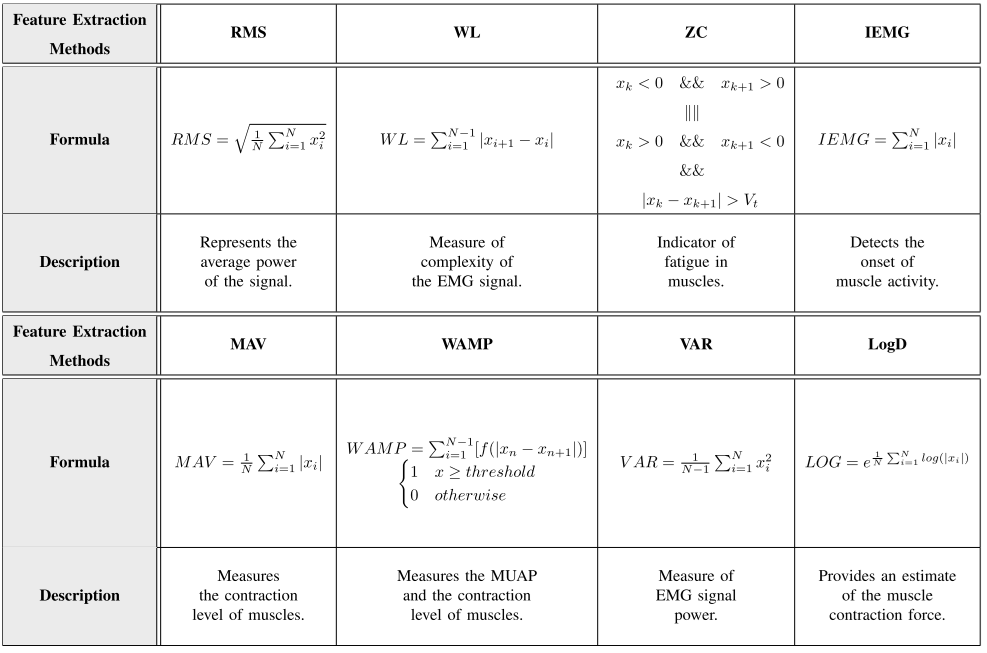

In [ ]:
## Seu Código Aqui

In [ ]:
from sklearn.ensemble import RandomForestClassifier

print('Training the model...')
# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
# Prediction step
rf_prediction = clf.predict(X_test)
counter = 0
accuracy = 0

# Calculates overall match accuracy (score equivalent)
for i in range(len(X_test)):
  if rf_prediction[i] == Y_test[i]:
    counter = counter + 1
accuracy = float(counter / (len(X_test)))
print(accuracy)

## **Tarefa 3: Discuta qual modelo apresentou o melhor resultado**


Sua explicação aqui:

## **Tarefa 4: Para o modelo que apresentou melhor resultado, verifique sua performance empregando outras métricas que não acuracia. Gere também uma matriz de confusão (confusion matrix)**


In [ ]:
## Seu Código Aqui

## **Tarefa 5: Varie o parâmetro n_estimators dentro da Random Forest e verifique se a performance melhora ou diminui.**


In [ ]:
## Seu Código Aqui